# Algunas estadísticas de un texto de un corpus

## Importar librerías

La celda que sigue contiene las librerías requeridas por este notebook.

In [1]:
from nltk.text import Text
from nltk.corpus import PlaintextCorpusReader
from nltk import FreqDist
from IPython.display import HTML
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
El código para este notebook de IPython se oculta por defecto para una lectura más fácil.
Para activar/desactivar el código, haga clic <a href="javascript:code_toggle()">aquí</a>.''')

## Funciones
La siguiente celda contiene algunas funciones que pueden ser usadas en otros notebooks.

In [3]:
def diversidad_lexica(texto):
    listatokens = []
    for word in texto:
        if word.isalpha():
            listatokens.append(word.lower())
    return  len(set(listatokens)) / len(listatokens)


def tokens(texto):
    listatokens = []
    for word in texto:
        if word.isalpha():
            listatokens.append(word.lower())
    return listatokens

## Corpus

In [4]:
# Directorio del corpus:
corpusRoot = '/Users/lino/PycharmProjects/Proyecto1_NLTK/PRESEEA/'
# Importar todos los archivos del directorio del corpus:
corpusRaw = PlaintextCorpusReader(corpusRoot, '.*')
corpus = corpusRaw.fileids() # Lista de todos los elementos del corpus.
print('El corpus está compuesto de los siguientes archivos:')
for documento in corpus:
    print(documento)

El corpus está compuesto de los siguientes archivos:
MEVE_H11_001.xml_sin etiquetas.txt
MEVE_H11_009.xml_sin etiquetas.txt
MEVE_H13_013.xml_sin etiquetas.txt
MEVE_H21_021.xml_sin etiquetas.txt
MEVE_H22_029.xml_sin etiquetas.txt
MEVE_H23_031.xml_sin etiquetas.txt
MEVE_H31_037.xml_sin etiquetas.txt
MEVE_H32_043.xml_sin etiquetas.txt
MEVE_H33_049.xml_sin etiquetas.txt
MEVE_M11_002.xml_sin etiquetas.txt
MEVE_M12_010.xml_sin etiquetas.txt
MEVE_M13_016.xml_sin etiquetas.txt
MEVE_M21_020.xml_sin etiquetas.txt
MEVE_M22_026.xml_sin etiquetas.txt
MEVE_M23_032.xml_sin etiquetas.txt
MEVE_M31_042.xml_sin etiquetas.txt
MEVE_M32_044.xml_sin etiquetas.txt
MEVE_M33_050.xml_sin etiquetas.txt


## Algunas estadísticas del corpus completo

### Promedio de tokens:

In [5]:
numeroDocumentosCorpus = len(corpus)
tamanoCorpus = 0
for documento in corpus:
    nombreDeDocumento = documento
    texto = Text(corpusRaw.words(documento))
    tamanoCorpus += len(tokens(texto))
print('Número de tokens de todo el corpus: {0:d}'.format(tamanoCorpus))
print('Número de documentos en el corpus: {0:d}'.format(numeroDocumentosCorpus))
print('Promedio de tokens por texto es: {0:.2f}'.format(tamanoCorpus / numeroDocumentosCorpus))

Número de tokens de todo el corpus: 157026
Número de documentos en el corpus: 18
Promedio de tokens por texto es: 8723.67


### Promedio del vocabulario:

In [6]:
numeroDocumentosCorpus = len(corpus)
vocabularioCorpus = 0
for documento in corpus:
    nombreDeDocumento = documento
    texto = Text(corpusRaw.words(documento))
    vocabularioCorpus += len(set(tokens(texto)))
print('Promedio del vocabulario en el corpus: {0:.2f}'.format(vocabularioCorpus/numeroDocumentosCorpus))

Promedio del vocabulario en el corpus: 1531.50


## Elección del texto a trabajar
En la variable *documento* se especifica el documento sobre el cual se desea trabajar. El nombre se puede cortar y pegar de la lista anterior.

In [7]:
documento = 'MEVE_M33_050.xml_sin etiquetas.txt'
texto = Text(corpusRaw.words(documento))

## Algunas estadísticas del texto:

### Tamaño del texto en tokens

In [8]:
tamanoTexto = len(tokens(texto))
print('El número de palabras de', documento, 'es:', tamanoTexto)

if tamanoTexto > (tamanoCorpus / numeroDocumentosCorpus):
    print("El documento {0} supera el tamaño promedio del corpus.".format(documento))
else:
    print('El documento {0} está por debajo del promedio para el corpus.'.format(documento))

El número de palabras de MEVE_M33_050.xml_sin etiquetas.txt es: 11943
El documento MEVE_M33_050.xml_sin etiquetas.txt supera el tamaño promedio del corpus.


### Tamaño del vocabulario del texto

In [9]:
tamanoVocabulario = len(set(tokens(texto)))
print('El tamaño del vocabulario de', documento, 'es:', tamanoVocabulario)

if tamanoVocabulario > (vocabularioCorpus/numeroDocumentosCorpus):
    print('El vocabulario del documento {0} es mayor que el vocabulario promedio del corpus.'.format(documento))
else:
    print('El vocabulario del documento {0} está por debajo del vocabulario promedio del corpus.'.format(documento))

El tamaño del vocabulario de MEVE_M33_050.xml_sin etiquetas.txt es: 1941
El vocabulario del documento MEVE_M33_050.xml_sin etiquetas.txt es mayor que el vocabulario promedio del corpus.


### Diversidad léxica del texto
Esto calcula el ratio entre el tamaño de su vocabulario y el número de tokens de un texto. Mientras mayor sea este número (con un máximo de 1), mayor variabilidad habrá en la utilización del vocabulario.

In [10]:
diversidad = diversidad_lexica(texto)
print('La diversidad léxica de {0} es: {1:.2f}'.format(documento, diversidad))

La diversidad léxica de MEVE_M33_050.xml_sin etiquetas.txt es: 0.16


### Palabras más comunes en el texto
Muestra el número de palabras más frecuente del texto, incluyendo las cantidades de cada una. El número de palabras puede ser cambiado en la variable *numeroPalabras*.

Si se desea descartar algunas palabras en particular (funcionales, códigos, etiquetas, etc.) se puede agregar a la lista *palabrasDescartadas*.

In [11]:
numeroPalabras = 40
palabrasDescartadas = ['I', 'risas']

distfreq = FreqDist(w for w in texto if w.isalpha() and w not in palabrasDescartadas)
print('Las', numeroPalabras, 'palabras más comunes son:')
distfreq.most_common(numeroPalabras)


Las 40 palabras más comunes son:


[('que', 475),
 ('de', 408),
 ('y', 363),
 ('la', 307),
 ('a', 284),
 ('en', 250),
 ('yo', 241),
 ('bueno', 231),
 ('no', 206),
 ('me', 183),
 ('el', 150),
 ('lo', 134),
 ('es', 133),
 ('una', 124),
 ('por', 122),
 ('un', 114),
 ('se', 109),
 ('como', 108),
 ('mi', 108),
 ('pero', 102),
 ('entonces', 99),
 ('muy', 94),
 ('porque', 93),
 ('los', 92),
 ('eso', 89),
 ('eh', 87),
 ('las', 80),
 ('o', 76),
 ('con', 73),
 ('era', 73),
 ('para', 71),
 ('del', 69),
 ('más', 59),
 ('fue', 55),
 ('le', 53),
 ('uno', 53),
 ('sea', 49),
 ('había', 47),
 ('cuando', 45),
 ('creo', 44)]

### Algunas palabras descriptivas
Se muestra a continuación algunas palabras que podrían ser descriptivas del texto en particular. Estas palabras son calculadas a partir de su frecuencia en el texto y de la longitud en letras de las mismas. En teoría, las palabras largas y relativamente comunes en el texto son un buen indicio para saber si son características del mismo o no.

La variable *longitud* indica el número de caracteres mínimo de la palabra.
La variable *frecuencia* indica el número mínimo de veces que la palabra debe aparecer en el texto.

In [17]:
longitud = 15
frecuencia = 0
descriptivas = sorted([w for w in set(texto) if len(w) >= longitud and distfreq[w] >= frecuencia])
print('Las palabras que podrían ser descriptivas de', documento, 'son:')
for palabra in descriptivas:
    print(palabra)

Las palabras que podrían ser descriptivas de MEVE_M33_050.xml_sin etiquetas.txt son:
afortunadamente
automáticamente
responsabilidad
sociolingüística


### Hápaxes
Un *hapax* es un término que aparece una sola vez en el texto.

In [13]:
print('Lista de tokens que aparece una sola vez en el texto', documento)
hapaxes = sorted(distfreq.hapaxes())
for palabra in hapaxes:
    print(palabra)

Lista de tokens que aparece una sola vez en el texto MEVE_M33_050.xml_sin etiquetas.txt
Americano
CD
California
Carreño
Colegio
D
Dios
Egipto
El
Estados
F
Francisco
G
Glorias
Inmaculada
Jají
L
Lagunillas
Letras
M
Marseille
Merida
Miyoy
O
P
Patrias
Provence
Próceres
R
Uher
Unidos
Universidad
V
Vallecito
Vigo
abajo
abandonaba
abandonar
abrazos
abre
abren
abrió
abríamos
abrían
abstracción
académica
académicas
académico
acciones
aciertos
acomodando
actividad
actividades
acto
acuerda
adolescencia
adulta
adultez
adulto
agarraba
agarrar
agarró
agasajos
agitada
agradables
agradezco
ah
ahogar
aislado
ajustar
alcanza
alcurnia
alegría
alimento
alturas
alumno
ama
amarraba
amasaba
amistades
amores
amplia
andino
andinos
anec
aniversario
ante
antropología
aparato
apasionante
aplicadas
apoyaron
aprende
aprendimos
aprendizaje
aprendizajes
arreglar
asamblea
asustábamos
atajo
atención
atrás
augurio
automatizaron
automáticamente
avenidas
aviones
avión
ayudan
ayudar
ayudas
ayunos
azúcar
bachillerato
bailan

### Colocaciones

In [14]:
print('Algunas colocaciones del texto:')
colocaciones = texto.collocations()

Algunas colocaciones del texto:
del entrevistador; creo que; risas del; entonces bueno; por ejemplo;
tal vez; por ahí; por supuesto; muy bien; este ...; gusta mucho; fue
una; darte cuenta; mmm ...; una especie; una persona; muchos cuentos;
las tradiciones; una buena; muchas cosas


### Frecuencias por tamaño de palabra
Se muestra, de manera tabulada, las frecuencias de palabras asociadas a su tamaño en caracteres. En otras palabras, se nos dice cuantas palabras de X caracteres hay en el texto.

Para especificar el número de elementos a mostrar en la tabla, se puede modificar la variable *numeroPalabras*.

In [15]:
numeroPalabras = 20
distfreqNum = FreqDist(len(w) for w in texto if w.isalpha())
print('Frecuencias por tamaño de la palabra: ')
distfreqNum.tabulate(numeroPalabras)

Frecuencias por tamaño de la palabra: 
   2    3    5    4    6    1    7    8    9   10   11   13   12   14   15   16 
2923 2144 1571 1326  900  803  760  659  344  212  162   68   55   11    4    1 


### Frecuencia acumulada de las palabras más frecuentes
Se muestra un gráfico con las frecuencias acumuladas de X número de palabras provenientes del texto. El número de palabras mostradas puede ser cambiado en la variable *numeroTokens*.

Este gráfico es muy útil para observar que cómo las palabras más frecuentes de un texto pueden cubrir gran parte del mismo. También es útil para encontrar palabras funcionales.

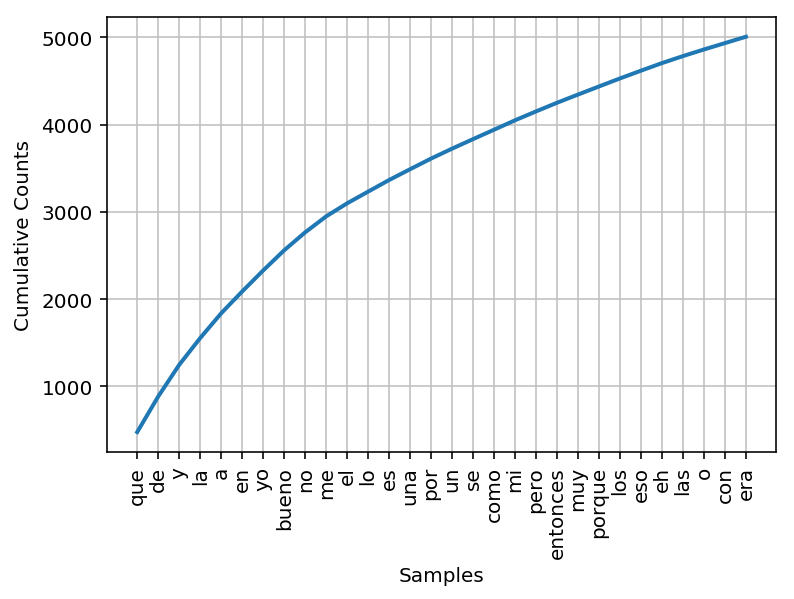

In [16]:
numeroTokens = 30
distfreq.plot(numeroTokens, cumulative=True)